In [1]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
driver_path = 'driver/chromedriver'
link = 'https://www.investing.com/equities/trending-stocks'

options = Options()
# options.add_argument('start-maximized')
options.add_argument("--window-size=1920,1080")
options.add_argument('--disable-extensions')
options.headless = False
driver = webdriver.Chrome(driver_path, options=options)
print('rendering page..')
driver.get(link)

rendering page..


WebDriverException: Message: unknown error: cannot determine loading status
from disconnected: received Inspector.detached event
  (Session info: chrome=79.0.3945.88)


In [3]:
# micro charts 
mcharts = driver.find_elements_by_id('microChartData')
for d in mcharts:
    print(' '.join(d.text.split('\n')[:2]))
    for _d in d.find_elements_by_tag_name('span'):
        print(_d.text, end=' ')
    print('\n')

Apple 291.86
+1.95 +0.67% 

Corporate Office Properties 29.25
+0.01 +0.03% 

Occidental 40.39
+0.23 +0.57% 

Wells Fargo&Co 53.95
-0.20 -0.37% 

Tesla 429.70
-1.14 -0.26% 

Amazon.com 1,893.12
+24.12 +1.29% 



In [4]:
# get charts' bars and tooltips elements
bars = []
for chart in driver.find_elements_by_css_selector('div.chartContainer'):
    for g in chart.find_elements_by_css_selector('g.highcharts-series.highcharts-tracker'):
        bars.append(g.find_elements_by_tag_name('rect'))
        break # break to avoid appending indentical child dom elements
tooltips = driver.find_elements_by_css_selector('div.highcharts-tooltip')
tt = lambda i : tooltips[i].find_element_by_tag_name('span')

In [5]:
# read trending top 15 chart tooltips
t = []
for bar in bars[0]:
    ActionChains(driver).move_to_element(bar).perform()
    _t = tt(0).text
    t.append(_t)
    print(_t)

Apple
Popularity: 11%
Change: 0.68%
Corporate Office Properties
Popularity: 9%
Change: 0.03%
Occidental
Popularity: 8%
Change: 0.54%
Wells Fargo&Co
Popularity: 8%
Change: -0.37%
Tesla
Popularity: 6%
Change: -0.29%
Amazon.com
Popularity: 6%
Change: 1.29%
AMD
Popularity: 6%
Change: -0.73%
Facebook
Popularity: 6%
Change: 0.11%
Alphabet A
Popularity: 5%
Change: -0.10%
Iterum Therapeutics
Popularity: 3%
Change: 73.88%
Microsoft
Popularity: 3%
Change: 0.03%
Boeing
Popularity: 3%
Change: 0.83%
Alibaba ADR
Popularity: 2%
Change: 0.43%
NVIDIA
Popularity: 2%
Change: -1.02%
FuelCell Energy
Popularity: 2%
Change: 28.32%


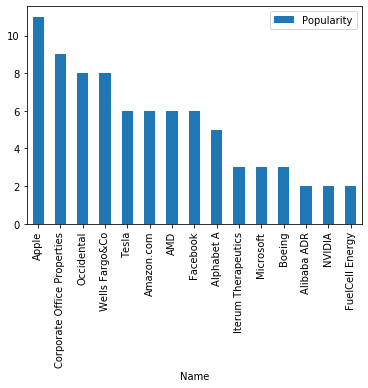

In [8]:
# plot chart 1 
chart1 = pd.DataFrame(columns=['Name', 'Popularity', 'Change'])
for i,_ in enumerate(t):
    d = eval('{\'Name\' : \'' + t[i].replace('\n', '\',\'').replace(': ', '\' : \'').replace('%', '') + '\'}')
    for k in d:
        d[k] = [d[k]]
    chart1 = chart1.append(pd.DataFrame(d), sort=True)
chart1['Popularity'] = chart1['Popularity'].apply(float)
chart1.plot.bar(x='Name', y='Popularity')

In [9]:
# read trending top 30 categories 
for bar in bars[1]:
    ActionChains(driver).move_to_element(bar).perform()
    print(tt(1).text)

Technology
8 of the stocks are up
0 of the stocks are unchanged
5 of the stocks are down
Services
5 of the stocks are up
0 of the stocks are unchanged
1 of the stocks are down
Financial
0 of the stocks are up
0 of the stocks are unchanged
2 of the stocks are down
Consumer Cyclical
0 of the stocks are up
0 of the stocks are unchanged
2 of the stocks are down
Healthcare
1 of the stocks are up
0 of the stocks are unchanged
1 of the stocks are down
Energy
2 of the stocks are up
0 of the stocks are unchanged
0 of the stocks are down
Capital Goods
1 of the stocks are up
0 of the stocks are unchanged
0 of the stocks are down
Basic Materials
1 of the stocks are up
0 of the stocks are unchanged
0 of the stocks are down


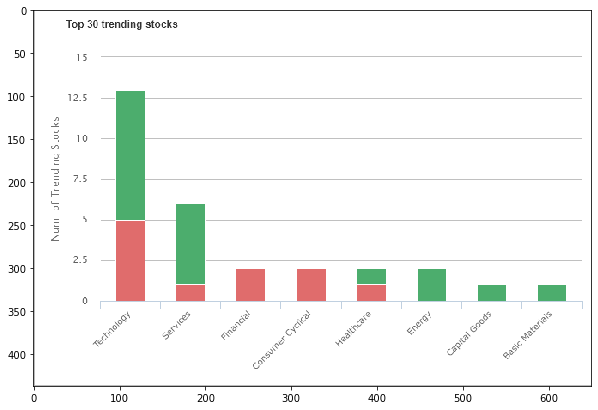

In [17]:
# chart 2 dirty plot 
time.sleep(1) # to avoid toolpit obstruction
driver.find_elements_by_css_selector('div.chartContainer')[1].screenshot('c2.png')
plt.figure(figsize=(10,10))
plt.imshow(mpimg.imread('c2.png'))

In [11]:
# scrape tables 
tables = {}
tbswitch = driver.find_element_by_class_name('js-stock-filter-buttons').find_elements_by_tag_name('a')
for switch in tbswitch:
    switch.click()
    ec = lambda driver: driver.find_element_by_id('trendingInnerContent').find_element_by_tag_name('table')
    WebDriverWait(driver, 5).until(ec)
    tables[switch.text] = pd.read_html(driver.page_source)[0].dropna(axis=1, how='all')

In [12]:
tables['Price']

,Name,Last,High,Low,Chg.,Chg. %,Vol.,Time
0,Apple,291.79,293.97,290.10,1.880,+0.65%,14.35M,10:53:01
1,Corporate Office Properties,29.25,29.39,29.21,0.010,+0.03%,44.30K,10:51:16
2,Occidental,40.40,40.47,40.23,0.240,+0.60%,1.96M,10:53:00
3,Wells Fargo&Co,53.97,54.32,53.88,-0.180,-0.33%,1.99M,10:53:12
4,Tesla,429.25,435.05,426.11,-1.590,-0.37%,4.29M,10:53:09
5,Amazon.com,1895.00,1901.00,1879.98,26.000,+1.39%,2.63M,10:52:55
6,AMD,46.26,46.87,46.19,-0.370,-0.79%,16.85M,10:53:02
7,Facebook,208.00,208.93,206.59,0.200,+0.10%,3.80M,10:52:42
8,Alphabet A,1361.68,1366.98,1354.48,-0.420,-0.03%,342.27K,10:53:02
9,Iterum Therapeutics,4.32,6.44,2.85,1.870,+76.33%,4.38M,10:52:53


In [13]:
tables['Performance']

,Name,Daily,1 Week,1 Month,YTD,1 Year,3 Years
0,Apple,0.68%,4.45%,8.98%,85.04%,86.83%,149.98%
1,Corporate Office Properties,-0.03%,-0.95%,-0.75%,38.99%,39.46%,-4.16%
2,Occidental,0.47%,3.44%,4.13%,-34.26%,-33.27%,-43.86%
3,Wells Fargo&Co,-0.37%,1.16%,-0.72%,17.08%,17.85%,-2.48%
4,Tesla,-0.28%,5.92%,29.68%,29.09%,28.68%,95.51%
5,Amazon.com,1.33%,6.01%,4.14%,26.09%,28.13%,145.28%
6,AMD,-0.92%,4.64%,17.23%,150.27%,159.26%,300.00%
7,Facebook,0.08%,0.81%,2.96%,58.65%,56.13%,77.87%
8,Alphabet A,-0.10%,0.71%,3.71%,30.22%,30.01%,69.13%
9,Iterum Therapeutics,77.55%,63.53%,89.96%,-13.17%,-20.91%,-


In [14]:
tables['Technical']

,Name,Hourly,Daily,Weekly,Monthly
0,Apple,Strong Buy,Strong Buy,Strong Buy,Strong Buy
1,Corporate Office Properties,Strong Buy,Strong Buy,Strong Buy,Strong Buy
2,Occidental,Strong Buy,Strong Buy,Strong Sell,Strong Sell
3,Wells Fargo&Co,Neutral,Buy,Strong Buy,Strong Buy
4,Tesla,Strong Buy,Strong Buy,Strong Buy,Strong Buy
5,Amazon.com,Strong Buy,Strong Buy,Strong Buy,Strong Buy
6,AMD,Buy,Strong Buy,Strong Buy,Strong Buy
7,Facebook,Strong Buy,Strong Buy,Strong Buy,Strong Buy
8,Alphabet A,Strong Buy,Strong Buy,Strong Buy,Strong Buy
9,Iterum Therapeutics,Strong Buy,Strong Buy,Neutral,Strong Sell


In [15]:
tables['Fundamental']

,Name,Average Vol. (3m),Market Cap,Beta
0,Apple,25.74M,1.30T,1.24
1,Corporate Office Properties,587.40K,3.28B,0.84
2,Occidental,9.56M,36.05B,0.89
3,Wells Fargo&Co,19.72M,228.43B,1.1
4,Tesla,9.27M,77.42B,0.67
5,Amazon.com,2.96M,938.55B,1.51
6,AMD,51.59M,51.66B,3.1
7,Facebook,13.67M,592.08B,1.06
8,Alphabet A,1.36M,935.94B,1.02
9,Iterum Therapeutics,92.19K,84.75M,-
